The imports

In [1]:
import numpy
import pandas as pd
import yfinance as yf
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\kashy\AppData\Local\Temp\ipykernel_5664\43834346.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Outputting the price table of a certain stock, which is currently Apple

In [2]:
stock = 'AAPL'

data_for_stock = yf.Ticker(stock)
data_for_stock = data_for_stock.history(period="8y")

del data_for_stock["Dividends"]
data_for_stock["Tomorrow"] = data_for_stock["Close"].shift(-1)
data_for_stock["Yesterday"] = data_for_stock["Close"].shift(1)
data_for_stock["Variance"] = data_for_stock["High"] - data_for_stock["Low"]
data_for_stock["Change"] = data_for_stock["Close"] - data_for_stock["Yesterday"]
data_for_stock["Low Wick"] = abs(data_for_stock["Close"] - data_for_stock["Low"])
data_for_stock["High Wick"] = abs(data_for_stock["High"] - data_for_stock["Close"])

data_for_stock

c:\Users\kashy\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:777: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Volume,Stock Splits,Tomorrow,Yesterday,Variance,Change,Low Wick,High Wick
Date,,,,,,,,,,,,
2016-04-04 00:00:00-04:00,25.235564,25.640084,25.201282,25.395544,149424800,0.0,25.096153,NaN,0.438801,NaN,0.194262,0.244539
2016-04-05 00:00:00-04:00,25.027592,25.306413,25.007022,25.096153,106314800,0.0,25.358978,25.395544,0.299391,-0.299391,0.089131,0.210260
2016-04-06 00:00:00-04:00,25.192144,25.363550,24.956745,25.358978,105616400,0.0,24.805912,25.096153,0.406806,0.262825,0.402234,0.004572
2016-04-07 00:00:00-04:00,25.128155,25.235570,24.709925,24.805912,127207600,0.0,24.833334,25.358978,0.525645,-0.553066,0.095987,0.429658
2016-04-08 00:00:00-04:00,24.890469,25.087014,24.721347,24.833334,94326800,0.0,24.915609,24.805912,0.365666,0.027422,0.111987,0.253680
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-26 00:00:00-04:00,170.000000,171.419998,169.580002,169.710007,57388400,0.0,173.309998,170.850006,1.839996,-1.139999,0.130005,1.709991
2024-03-27 00:00:00-04:00,170.410004,173.600006,170.110001,173.309998,60273300,0.0,171.479996,169.710007,3.490005,3.599991,3.199997,0.290009
2024-03-28 00:00:00-04:00,171.750000,172.229996,170.509995,171.479996,65672700,0.0,170.029999,173.309998,1.720001,-1.830002,0.970001,0.750000


The below is to plot the stocks over time.

c:\Users\kashy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kashy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The Stock Price')

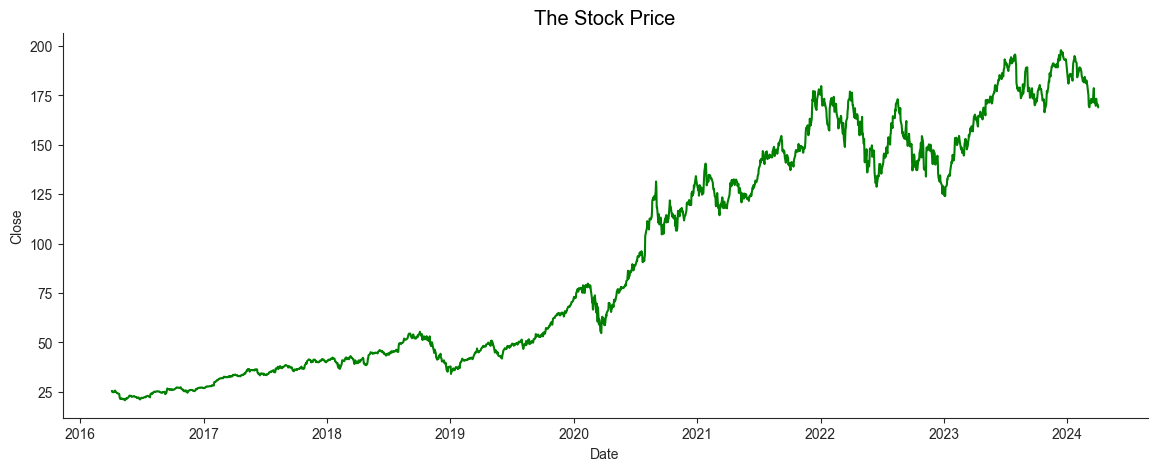

In [3]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=data_for_stock,x="Date",y='Close',color='green')
sns.despine()
plt.title("The Stock Price",size='x-large',color='black')

Creating the training and testing data

In [4]:
import sklearn

1


c:\Users\kashy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kashy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kashy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kashy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

Text(0.5, 1.0, 'The Data')

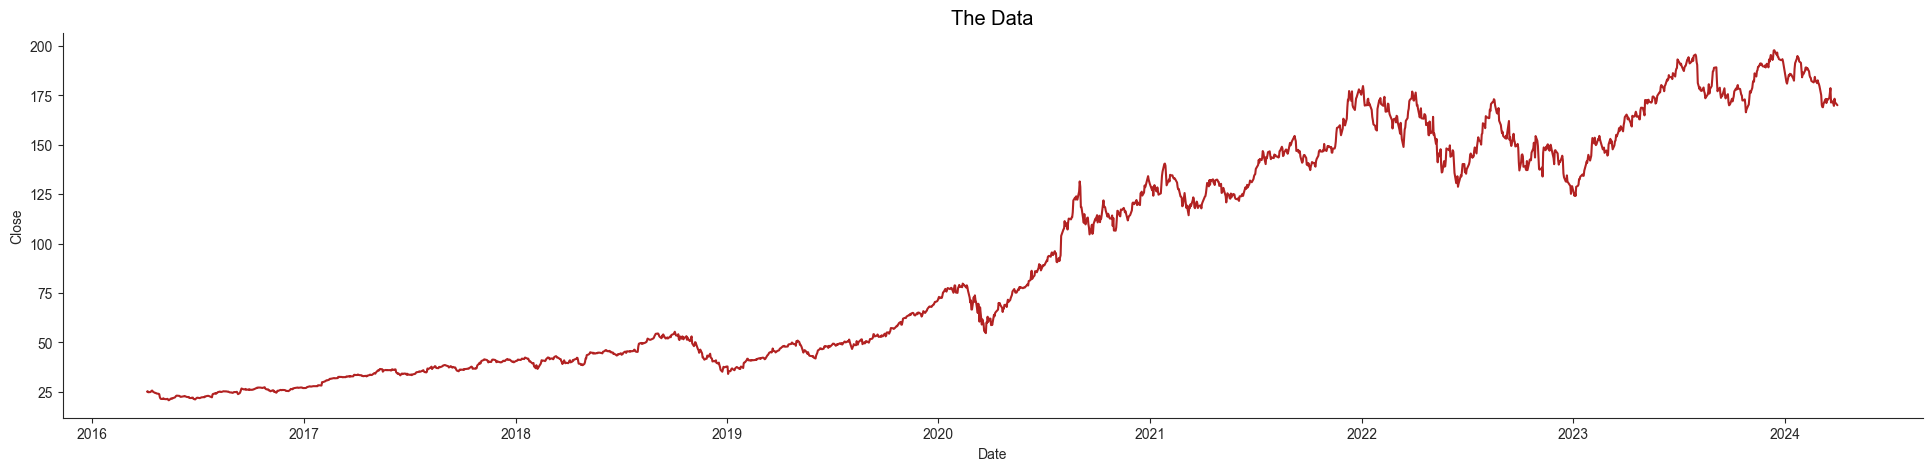

In [5]:
train_d = data_for_stock[-1*len(data_for_stock) + 1:-1]
test_d = data_for_stock[-1:]

print(len(test_d))

plt.figure(figsize=(24,5))
sns.set_style("ticks")
sns.lineplot(data=train_d,x="Date",y='Close',color='firebrick')
sns.lineplot(data=test_d,x="Date", y='Close', color='blue')
sns.despine()
plt.title("The Data",size='x-large',color='black')

In [6]:
# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor(max_depth=10, random_state=1)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=1)

predictors = ["Change", "Yesterday", "Variance", "Close", "Stock Splits", "High Wick", "Low Wick"]
# predictors = ["Open", "High", "Low", "Volume", "Change"]
model = model.fit(train_d[predictors], train_d["Tomorrow"])

In [7]:
from sklearn.metrics import explained_variance_score

predictions = model.predict(test_d[predictors])

count = 0
print("Predicted\t\tActual")

for i in range(len(test_d)):
    print(str(predictions[i]) + "\t" + str(test_d["Tomorrow"][i]))
    if (abs(test_d["Tomorrow"][i] - predictions[i]) <= 0.02 * test_d["Tomorrow"][i]):
        count += 1
# print("\n" + str(count / len(test_d)))
# explained_variance_score(test_d["Close"], predictions)


Predicted		Actual
168.02661669270583	nan


C:\Users\kashy\AppData\Local\Temp\ipykernel_5664\3888141819.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(str(predictions[i]) + "\t" + str(test_d["Tomorrow"][i]))
C:\Users\kashy\AppData\Local\Temp\ipykernel_5664\3888141819.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (abs(test_d["Tomorrow"][i] - predictions[i]) <= 0.02 * test_d["Tomorrow"][i]):
